# Natural Language Processing(NLP) - zomato Reviews

## In this project we are going to perform Natural Language Processing. 
## We are going to use CountVectorizer( Bag Of Words) Technique to predict Positive and Negative reviews.

# Problem Statement:
## To verify the Sentiment Analysis to determine whether the data is positive or negative

### Each review contains textual feedback along with a 1-to-5 star rating system (1 being least satisfied and 5 being most satisfied).
### classification models to develop algorithms capable of classifying interactions by sentiment.
### Steps: 1)Read and analyze the input text data and the corresponding response variables (ratings)
###        2)Perform basic pre-processing to prepare the data for modeling
###        3)Learn and apply various ways of featurizing the reviews text
###        4)Build machine learning models to classify text as either exhibiting positive or negative sentiment (1 or 0).

In [1]:
# General packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# NLP packages
import nltk
# split into part of each word in the sentence
# convert the text into some format that the computer can interpret
from nltk import word_tokenize
# While we analyze the text, we are using sklearn package again to model our text features.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# from collections import Counter


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Modeling Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sushmapawar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sushmapawar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sushmapawar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
#to store the new CSV file
OUTPUT_PATH = '/Users/sushmapawar/Desktop/Projects/SentimentalAnalysis/'

## -------------------Reading and performing basic analysis of the data------------------------

In [3]:
# Read the Dataset
zomato = pd.read_csv(r'/Users/sushmapawar/Desktop/Projects/SentimentalAnalysis/sentiment_analysis_output.csv')

### DATASET DETAILS:--->
#### Unnamed: 0 (ordinal): index number   
#### Restaurant_Name (text) : Name of restaurant scraped   
#### Restaurant_rated (numeric) :   rating given to restaurant                            
#### Review_Written_By (text): registered user profile name.
#### User_Rated_Restaurant  (ordinal): rating between 1 and 5 by each user.
#### Written_Review (text): text of the review.

In [4]:
# to know how many rows and columns dataframe has
print('DATAFRAME contains how many rows and columns:\n',zomato.shape)

# to know the datatypes
print('DATATYPES:\n',zomato.info())
# print(zomato.describe().transpose())


# Check the head function
print('FIRST ROWS OF DATAFRAME ARE:\n',zomato.head())


# # Check the nulls
print('How many NULLS are their in zomato Dataframe:\n',zomato.isnull().sum())

DATAFRAME contains how many rows and columns:
 (3306, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3306 non-null   int64  
 1   Restaurant_Name        3306 non-null   object 
 2   Restaurant_rated       3306 non-null   float64
 3   Review_Written_By      3306 non-null   object 
 4   User_Rated_Restaurant  3306 non-null   float64
 5   Written_Review         1909 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 155.1+ KB
DATATYPES:
 None
FIRST ROWS OF DATAFRAME ARE:
    Unnamed: 0 Restaurant_Name  Restaurant_rated Review_Written_By  \
0           0            Toit               4.7   Brijmohan Patil   
1           1            Toit               4.7    Jasleen Rajpal   
2           2            Toit               4.7       Rukmini Das   
3           3            Toit     

## ------------------------DATA PREPARATION------------------------

In [5]:
# replacing blanks in Written_Review with "-"
zomato["Written_Review"].fillna("-",inplace=True)
print(zomato)



      Unnamed: 0 Restaurant_Name  Restaurant_rated  Review_Written_By  \
0              0            Toit               4.7    Brijmohan Patil   
1              1            Toit               4.7     Jasleen Rajpal   
2              2            Toit               4.7        Rukmini Das   
3              3            Toit               4.7      Ritu Upadhyay   
4              4            Toit               4.7           Sambhavi   
...          ...             ...               ...                ...   
3301        3301     Cafe Paashh               4.9      Shuchi Saxena   
3302        3302     Cafe Paashh               4.9   Mohnish Chordiya   
3303        3303     Cafe Paashh               4.9  Aditya Shrimankar   
3304        3304     Cafe Paashh               4.9           Nehaa T.   
3305        3305     Cafe Paashh               4.9       Dishita Shah   

      User_Rated_Restaurant                                     Written_Review  
0                       4.0               


Splitted Review By Spaces:
 0        1
1       11
2       16
3        1
4        1
        ..
3301     1
3302     1
3303     1
3304    13
3305     1
Name: Written_Review, Length: 3306, dtype: int64


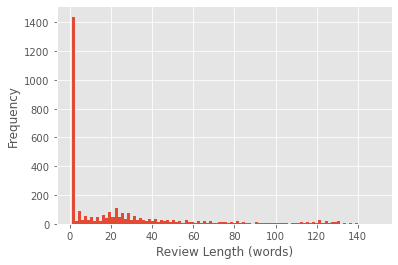

Average words: 25.171203871748336
Skewness: 1.6621400523063772


In [6]:
# the distribution of number of words per review.lambda function that splits each complete review by spaces
# getting the number of words by splitting them by space
words_per_review = zomato.Written_Review.apply(lambda x: len(x.split(" ")))
print('\nSplitted Review By Spaces:\n',words_per_review)
words_per_review.hist(bins=100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

print('Average words:',words_per_review.mean())
print('Skewness:',words_per_review.skew())

# We can see that the number of words per user review is highly positive skewed with mean of 25, 
# which means that on average, user reviews have 25 words.



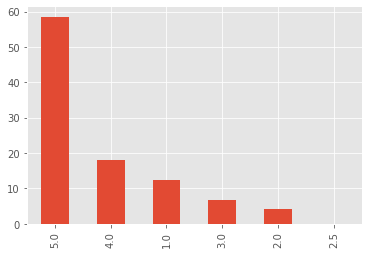

In [7]:
percent_val = 100 * zomato['User_Rated_Restaurant'].value_counts()/len(zomato)
percent_val
percent_val.plot.bar()
plt.show()
# The distribution is quite skewed, with a more number of 5 and very few 3, 2, and 1.

## -----------------Standardizing the ratings for sentiment analysis (5)--------------

#### For the purposes of sentiment analysis, we will convert all of the ratings into binary values:

#### 1) Ratings of 4 or 5 will get mapped to 1 and will be reltead to positive reviews
#### 2) Ratings of 1 or 2 will get mapped to 0 and will be related to negative reviews
#### 3) Ratings of 3 will get removed since they will represent neutral reviews.

1    2535
0     771
Name: Sentiment_Rating, dtype: int64


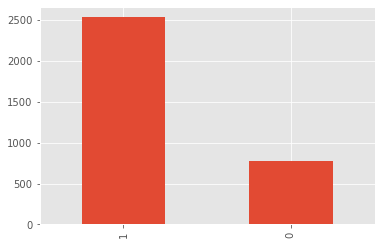

In [8]:
# Mapping the ratings
zomato['Sentiment_Rating']= np.where(zomato.User_Rated_Restaurant <= 3,0,1)
# removing neutral reviews
# zomato = zomato[zomato.User_Rated_Restaurant !=3]
# printing the counts of each class
print(zomato['Sentiment_Rating'].value_counts())
zomato.Sentiment_Rating.value_counts().plot.bar()
plt.show()

In [9]:
# dowload the Data cleaned CSV
zomato.to_csv(OUTPUT_PATH + 'Data_Prepared_Dataset.csv')

# After performing EDA how many rows and columns dataframe has
print('After EDA dataframe has rows and columns:',zomato.shape)

After EDA dataframe has rows and columns: (3306, 7)


## --------------------------Pre-processing-----------------------

#### text preprocessing and normalization is crucial before building a proper NLP model. 
#### Some of the important steps are:
####                               1) Converting words to lower/upper case
####                               2) Removing special characters
####                               3) Removing stopwords and high/low-frequency words
####                               4) Stemming/lemmatization

# .......................1. Converting words to lower/upper case............................


In [10]:
zomato['Written_Review_new'] = zomato.Written_Review.str.lower()

In [11]:
# the number of unique words that are found in reviews before and after applying this step. 
# This process of extracting individual words is called word tokenization,
#  and can be run using the word_tokenize function in the nltk package:

# for written reviews not converted to lower case
token_lists = [word_tokenize(each) for each in zomato['Written_Review']]
tokens = [item for sublist in token_lists for item in sublist]
print('Number of unique tokens then:',len(set(tokens)))

# for written reviews converted to lower case
token_lists = [word_tokenize(each) for each in zomato['Written_Review_new']]
tokens = [item  for sublist in token_lists for item in sublist]
print('Number of unique tokens then:',len(set(tokens)))

Number of unique tokens then: 7846
Number of unique tokens then: 6475


# .........................2. Removing special characters..........................
### removing non-emotionally charged punctuation such as commas, periods, and semicolons
### The following gives a list of all the special characters in our dataset

In [12]:
# selecting non-alpha numeric characters that are not spaces
spl_chars = zomato['Written_Review_new'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])
# getting list of list into single list 
flat_list = [item  for sublist in spl_chars for item in sublist]
# Unique special characters
set(flat_list)

{'\n',
 '!',
 '"',
 '#',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '?',
 '@',
 '^',
 '_',
 '|',
 '~',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '₹',
 '☹',
 '☺',
 '♀',
 '♥',
 '✅',
 '✌',
 '✔',
 '✨',
 '❣',
 '❤',
 '⭐',
 '️',
 '🌃',
 '🌈',
 '🌉',
 '🌊',
 '🌟',
 '🌮',
 '🌶',
 '🍈',
 '🍉',
 '🍊',
 '🍍',
 '🍔',
 '🍕',
 '🍖',
 '🍗',
 '🍟',
 '🍧',
 '🍪',
 '🍮',
 '🍰',
 '🍱',
 '🍷',
 '🍸',
 '🍹',
 '🍺',
 '🍻',
 '🍾',
 '🍿',
 '🎉',
 '🎊',
 '🎵',
 '🎶',
 '🏖',
 '🏻',
 '🏼',
 '🐔',
 '👀',
 '👅',
 '👊',
 '👌',
 '👍',
 '👎',
 '👏',
 '👑',
 '👹',
 '💃',
 '💓',
 '💕',
 '💖',
 '💗',
 '💛',
 '💜',
 '💥',
 '💫',
 '💯',
 '📌',
 '📍',
 '🔥',
 '😀',
 '😁',
 '😂',
 '😃',
 '😅',
 '😇',
 '😉',
 '😊',
 '😋',
 '😍',
 '😎',
 '😏',
 '😐',
 '😑',
 '😔',
 '😘',
 '😜',
 '😝',
 '😤',
 '😥',
 '😬',
 '😮',
 '😻',
 '🙂',
 '🙅',
 '🙌',
 '🙏',
 '🤌',
 '🤔',
 '🤗',
 '🤘',
 '🤟',
 '🤣',
 '🤤',
 '🤩',
 '🤪',
 '🤷',
 '🥂',
 '🥃',
 '🥚',
 '🥝',
 '🥟',
 '🥰',
 '🥳',
 '\U0001f979',
 '🥺',
 '🦆',
 '🦢',
 '🧀',
 '🧁',
 '🧆',
 '🧸',
 '🫐'}

#### [ ]: match any character inside the list defined by the square brackets, including the space character ' '
#### ^: start of the line
#### A-Z: accept english upper case characters from A to Z
#### a-z: accept english lower case characters from a to z
#### 0-9: accept single number characters from 0 to 9

In [13]:
review_backup = zomato['Written_Review_new'].copy()
zomato['Written_Review_new'] = zomato['Written_Review_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

print('-Old Review:-')
print(review_backup.values[6])
print('-New Review-')
print(zomato['Written_Review_new'][6])

-Old Review:-
looks good, delivery boy spoiled it
-New Review-
looks good  delivery boy spoiled it


In [14]:
# for written reviews not converted to lower case
token_lists = [word_tokenize(each) for each in zomato['Written_Review']]
tokens = [item  for sublist in token_lists for item in sublist]
print('Number of unique tokens then:',len(set(tokens)))

# for written reviews converted to lower case
token_lists = [word_tokenize(each) for each in zomato['Written_Review_new']]
tokens = [item  for sublist in token_lists for item in sublist]
print('Number of unique tokens then:',len(set(tokens)))

Number of unique tokens then: 7846
Number of unique tokens then: 5770


# ........................3. Stopwords and high/low frequency words............................
#### stopwords naturally occur very frequently in the English language
####  without adding any context specific insights. It makes sense to remove them

In [15]:
from nltk.corpus import stopwords
# to see which all languages are available
print(stopwords.fileids())


noise_words = []
# list of English stopwords:
eng_stop_words = stopwords.words('english')
eng_stop_words

stop_words = set(eng_stop_words)
Without_stop_words = []
stopword = []
sentence = zomato['Written_Review_new'][1]
words = nltk.word_tokenize(sentence)
for word in words:
  if word in stop_words:
    stopword.append(word)
  else:
    Without_stop_words.append(word)

print('Original sentence',sentence)
print('Stopwords in the sentence',stopword)
print('Non-stopwords in the sentence',Without_stop_words)



['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']
Original sentence best food ever  and the packaging was a solid 10 10 loved it 
Stopwords in the sentence ['and', 'the', 'was', 'a', 'it']
Non-stopwords in the sentence ['best', 'food', 'ever', 'packaging', 'solid', '10', '10', 'loved']


In [16]:
# function to omit these stopwords from our written reviews:
def stopwords_removal(stop_words,sentence):
  return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]
zomato['Written_Review_nonstop'] = zomato['Written_Review_new'].apply(lambda row: stopwords_removal(stop_words, row))
print(zomato[['Written_Review_new','Written_Review_nonstop']])

                                     Written_Review_new  \
0                                                         
1     best food ever  and the packaging was a solid ...   
2     crumb could be a litter lesser n fish more non...   
3                                                         
4                                                         
...                                                 ...   
3301                                                      
3302                                                      
3303                                                      
3304  not too good  was expecting more from here sin...   
3305                                                      

                                 Written_Review_nonstop  
0                                                    []  
1     [best, food, ever, packaging, solid, 10, 10, l...  
2     [crumb, could, litter, lesser, n, fish, noneth...  
3                                                    []  
4

###.........................4. Stemming & lemmatization...............................
#### Stemming works by cutting off the end or the beginning of the word.
#### Lemmatization considers the grammar of the word and tries to find the root word.
#### we get a meaning root word from Lemmatizer while 
#### Stemmer just cuts out and extracts the first important part of the word.

In [17]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()


def stemm_terms(row):
    return [lancaster.stem(term) for term in row]
def lemmatize_terms(row):
    return [lemmatizer.lemmatize(term) for term in row]
    
zomato['Written_Review_stemm'] = zomato['Written_Review_nonstop'].apply(lambda row: stemm_terms(row))
zomato['Written_Review_lemm'] = zomato['Written_Review_nonstop'].apply(lambda row: lemmatize_terms(row))
print(zomato[['Written_Review_nonstop','Written_Review_stemm','Written_Review_lemm']])



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sushmapawar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                 Written_Review_nonstop  \
0                                                    []   
1     [best, food, ever, packaging, solid, 10, 10, l...   
2     [crumb, could, litter, lesser, n, fish, noneth...   
3                                                    []   
4                                                    []   
...                                                 ...   
3301                                                 []   
3302                                                 []   
3303                                                 []   
3304             [good, expecting, since, prices, high]   
3305                                                 []   

                                   Written_Review_stemm  \
0                                                    []   
1            [best, food, ev, pack, solid, 10, 10, lov]   
2     [crumb, could, lit, less, n, fish, nonetheless...   
3                                                    []

# ----------------------------Building a machine learning model--------------------

### A)________________________Bag-of-words________________________
#### The bag-of-words procedure falls under a broader category of techniques known as count-based representations.
####  create a word-document co-occurrence matrix for our set of reviews using the CountVectorizer class 
#### that automatically accounts for certain preprocessing steps like removing stopwords, stemming,and word tokenization.

In [18]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(zomato['Written_Review_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df.head())

   00  000  000rs  00pm  10  100  1000  100rs  1058  10mins  ...  yumm  \
0   0    0      0     0   0    0     0      0     0       0  ...     0   
1   0    0      0     0   2    0     0      0     0       0  ...     0   
2   0    0      0     0   0    0     0      0     0       0  ...     0   
3   0    0      0     0   0    0     0      0     0       0  ...     0   
4   0    0      0     0   0    0     0      0     0       0  ...     0   

   yummiest  yummmm  yummy  zafrani  zero  zest  zishan  zomato  zone  
0         0       0      0        0     0     0       0       0     0  
1         0       0      0        0     0     0       0       0     0  
2         0       0      0        0     0     0       0       0     0  
3         0       0      0        0     0     0       0       0     0  
4         0       0      0        0     0     0       0       0     0  

[5 rows x 5739 columns]


In [19]:
### Creating a python object of the class CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize,    # type of tokenization
                             stop_words=noise_words,      # List of stopwords
                             ngram_range=(1,1))           # number of n-grams

bow_data = bow_counts.fit_transform(zomato['Written_Review_new'])
# sparse matrix is created.
print(bow_data)

  (1, 627)	1
  (1, 2049)	1
  (1, 1814)	1
  (1, 319)	1
  (1, 5152)	1
  (1, 3613)	1
  (1, 5566)	1
  (1, 133)	1
  (1, 4719)	1
  (1, 6)	2
  (1, 3026)	1
  (1, 2672)	1
  (2, 319)	1
  (2, 5152)	1
  (2, 133)	1
  (2, 1354)	1
  (2, 1287)	1
  (2, 575)	1
  (2, 2967)	1
  (2, 2912)	1
  (2, 3344)	1
  (2, 2006)	1
  (2, 3281)	1
  (2, 3423)	1
  (2, 5144)	1
  :	:
  (3299, 5518)	1
  (3299, 3336)	1
  (3299, 3187)	1
  (3299, 454)	1
  (3299, 2675)	1
  (3299, 3284)	1
  (3299, 5461)	1
  (3299, 2480)	1
  (3299, 2368)	1
  (3299, 867)	1
  (3299, 3717)	1
  (3299, 1118)	1
  (3304, 5566)	1
  (3304, 3281)	1
  (3304, 2220)	1
  (3304, 3435)	1
  (3304, 390)	1
  (3304, 2407)	1
  (3304, 4708)	1
  (3304, 2414)	1
  (3304, 2125)	1
  (3304, 5256)	1
  (3304, 3949)	1
  (3304, 4632)	1
  (3304, 1869)	1


In [20]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    zomato['Sentiment_Rating'], # Target variable
                                                                    test_size = 0.2,            # 20% test size
                                                                    random_state = 0)           # random state for replication purposes
print(y_test_bow.value_counts()/y_test_bow.shape[0])  
# The test data contains 78% positive sentiment reviews

1    0.787009
0    0.212991
Name: Sentiment_Rating, dtype: float64


In [21]:
# -----------------Applying NAIVE_BAYES Algorithm---------
# Input the NB algorithm
# We can also use DT , RF , Logistic Regression, etc. 
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
print(NB)

# Fit the model over train data 
NB.fit(X_train_bow, y_train_bow)

# PREDICTION
pred_zomato = NB.predict(X_test_bow)
print('Prediction:\n',pred_zomato)

print('Actual:\n',y_test_bow)

#Import the confusion matrix from metrics
from sklearn.metrics import confusion_matrix

# Check the confusion matrix 
tab_zomato = confusion_matrix(pred_zomato, y_test_bow)
print('\nCONFUSION MATRIX WITH BAG-OF-WORDS:\t',tab_zomato)

# Check the accuracy for the formed model 
Acc = tab_zomato.diagonal().sum() / tab_zomato.sum() * 100
print("\nOUR MODEL HAS ACCURACY WITH BAG-OF-WORDS:\t", Acc ,'%')



# -------------------Applying LOGISTIC REGRESSION Algorithm---------
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow) # Class prediction

## Calculate key performance metrics
print("\nF1 score:\t ", f1_score(y_test_bow, test_pred_lr_all))


MultinomialNB()
Prediction:
 [1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 

In [22]:
### Changes with respect to the previous code
### 1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
### 2. Including the stopwords in the bag of words features
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(zomato.Written_Review_new)
bow_data

<3306x184038 sparse matrix of type '<class 'numpy.int64'>'
	with 303687 stored elements in Compressed Sparse Row format>

In [23]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    zomato['Sentiment_Rating'],
                                                                    test_size = 0.2,
                                                                    random_state = 0)
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

# Predicting the results
test_pred_lr_all = lr_model_all_new.predict(X_test_bow)

print("\nF1 score:\t ", f1_score(y_test_bow,test_pred_lr_all))


F1 score:	  0.9197080291970803


In [24]:
# interpretable features from this in terms of what contributed the most to positive and negative sentiment:
lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(),     # get all the n-gram feature names
                                   lr_model_all_new.coef_[0])),        # get the logistic regression coefficients
                          columns= ['words','weights'])                # defining the colunm names

print(lr_weights.sort_values(['weights'], ascending = False)[:15]) 
# top-15 more important features for positive reviews


            words   weights
66432       great  1.295028
10034     amazing  1.137025
125940      rohit  1.033489
52032   excellent  0.971883
23684     awesome  0.927983
28713        best  0.829009
99740        nice  0.791629
64075        good  0.774817
90290        love  0.566638
11172    ambience  0.548218
90525       loved  0.516927
44537   delicious  0.461252
167105       vibe  0.459149
160341       toit  0.437297
115274      place  0.431114


In [25]:
print(lr_weights.sort_values(['weights'], ascending = False)[-15:])
# top-15 more important features for negative reviews

            words   weights
126300    rubbish -0.552890
142053      taste -0.611075
153069       they -0.612738
32525         but -0.684858
111226  overrated -0.700857
112709   pathetic -0.702775
52588   expensive -0.706788
87641        less -0.819078
23392     average -0.842831
24295         bad -0.905755
108609      order -0.941093
100513         no -1.013946
39382        cold -1.068418
101158        not -1.350875
181286      worst -1.622384


### B)_____________________TF-IDF MODEL_____________________________
#### bag-of-words are not the only way to featurize text. Another method is the Term Frequency-Inverse Document Frequency (TF-IDF) method.
#### This evaluates how important a word is to a document within a large collection of documents (i.e. corpus). 
#### The importance increases proportionally based on the number of times a word appears in the document but is offset by the frequency of the word in the corpus.
#### The TF-IDF weight is the product of two terms. 
#### The first computes the normalized Term Frequency (TF); i.e. the number of times a word appears in a document divided by the total number of words in that document. 
#### The second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(zomato['Written_Review_new'])
tfidf_data

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            zomato['Sentiment_Rating'],
                                                                            test_size = 0.2,
                                                                            random_state = 0)

In [27]:
# -------------Applying NAIVE-BAYES algorithm to TF-IDF features--------
# Input the NB algorithm
# We can also use DT , RF , Logistic Regression, etc. 
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
print(NB)

# Fit the model over train data 
NB.fit(X_train_bow, y_train_bow)

# PREDICTION
pred_zomato = NB.predict(X_test_bow)
print('Prediction:\n',pred_zomato)

print('Actual:\n',y_test_bow)

#Import the confusion matrix from metrics
from sklearn.metrics import confusion_matrix

# Check the confusion matrix 
tab_zomato = confusion_matrix(pred_zomato, y_test_bow)
print('\nCONFUSION MATRIX WITH TD-IDF:\t',tab_zomato)

# Check the accuracy for the formed model 
Acc = tab_zomato.diagonal().sum() / tab_zomato.sum() * 100
print('\nOUR MODEL HAS ACCURACY WITH TD-IDF:\t',Acc ,'%')



# -------------Applying LOGISTIC REGRESSION to TF-IDF features--------
### Setting up the model class
lr_model_tf_idf = LogisticRegression()

## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("\nF1 score TD-IDF: \t",f1_score(y_test_bow, test_pred_lr_all))
# their is a slightly increased in our F1 score value with TF-IDF as compared to the bag-of-words approach.

MultinomialNB()
Prediction:
 [1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 